To test the quality of Wine using Linear Regression

In [15]:
#Importing the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
wine=pd.read_csv("C:/Users/Adithya Arunganesh/Desktop/Projects/WineQuality_LinearReg/winequality-red.csv")

#Data types in wine dataset
wine.info()

#First 5 observations in wine dataset
wine.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Finding correlation between the each attributes

In [5]:
# All the values in the data set are numbers, hence using regression model!

#The dependent variable is "Quality" since we are predicting the wine quality. Therefore we will drop the "quality" variable

correlation=wine.corr()['quality'].drop('quality')
correlation

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

Lets use heatmaps to get a better picture of the correlation

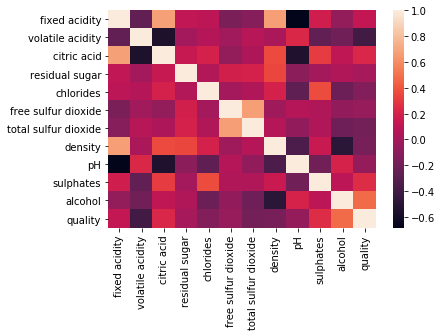

In [6]:
sns.heatmap(wine.corr())

In [7]:
#We will take in all the features whose correlation is above a threshold value; For this lets define a function "features"

def features (corr_threshold):
    abs_corr=correlation.abs()
    high_corr=abs_corr [abs_corr>corr_threshold].index.values.tolist()
    return high_corr



In [8]:
#Setting the threshold tp 0.05
#x-variables contains the indepent variables and y-variable will have dependent variable quality

#Taking features whose correlation is higher than 0.05
feature=features(0.05)
print(feature)
x=wine[feature]
y=wine['quality']

#['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
#'density', 'pH', 'sulphates', 'alcohol']
#Above are the features whose threshold is higher than 0.05 and these will the independent variable that will be used to 
# predict the wine quality

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

x_train.shape
y_train.shape
x_test.shape
y_test.shape

(400,)

In [10]:
#Fitting the Linear Regression model

linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
train_pred=linreg.predict(x_train)
test_pred=linreg.predict(x_test)

train_pred
test_pred

array([5.10801475, 5.65933623, 5.90407267, 6.13461179, 5.00611866,
       5.44514691, 5.05735245, 6.15497513, 5.51919603, 5.77259374,
       5.61809366, 5.23616173, 5.23544213, 5.31968644, 6.47007277,
       5.043404  , 5.85287121, 5.19427909, 6.07727089, 6.34949018,
       6.42525555, 5.51221957, 5.8030796 , 4.93637817, 5.16618356,
       5.48255293, 5.13758624, 6.60000969, 5.88754763, 5.74133915,
       6.09716961, 6.29379754, 4.91269821, 5.88611904, 5.11007273,
       5.94574773, 6.80685536, 5.04305653, 5.25438683, 5.88611904,
       5.17406542, 4.84008442, 6.48781656, 5.40521715, 5.31105571,
       5.84484462, 5.7100681 , 5.24300809, 5.25021217, 5.46398911,
       5.08740494, 5.61369555, 6.01375792, 6.32497377, 5.47511954,
       5.36466869, 5.09234555, 4.92625623, 5.21415941, 5.08274744,
       4.79570013, 5.4377645 , 5.25237771, 5.68830391, 5.85145609,
       6.52420079, 5.38691412, 5.71775637, 5.17641417, 5.99156845,
       5.6445189 , 5.60892012, 5.74967567, 5.21702288, 5.97975

In [12]:
train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
print(train_rmse)
test_rmse = mean_squared_error(test_pred,y_test) **0.5
print(test_rmse)

0.6525240995947054
0.627538153923098


# The root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample and population values) predicted by a model and the values actually observed. 


# The RMSE for your training and your test sets should be very similar if you have built a good model. 


# If the RMSE for the test set is much higher than that of the training set, it is likely that you've badly over fit the data

In [13]:
#Lets round the predicted test values

predicted_test_values=np.round(test_pred)
predicted_test_values

array([5., 6., 6., 6., 5., 5., 5., 6., 6., 6., 6., 5., 5., 5., 6., 5., 6.,
       5., 6., 6., 6., 6., 6., 5., 5., 5., 5., 7., 6., 6., 6., 6., 5., 6.,
       5., 6., 7., 5., 5., 6., 5., 5., 6., 5., 5., 6., 6., 5., 5., 5., 5.,
       6., 6., 6., 5., 5., 5., 5., 5., 5., 5., 5., 5., 6., 6., 7., 5., 6.,
       5., 6., 6., 6., 6., 5., 6., 6., 5., 6., 6., 6., 6., 5., 5., 6., 6.,
       5., 5., 6., 6., 6., 6., 6., 6., 5., 5., 5., 5., 5., 5., 7., 6., 6.,
       6., 6., 6., 5., 5., 5., 5., 6., 6., 5., 6., 6., 5., 5., 5., 5., 6.,
       6., 6., 5., 5., 5., 6., 6., 6., 6., 5., 5., 5., 5., 6., 6., 7., 6.,
       6., 6., 5., 5., 6., 7., 5., 5., 6., 5., 6., 6., 7., 5., 5., 5., 6.,
       5., 5., 6., 6., 5., 5., 6., 6., 6., 6., 6., 6., 5., 6., 5., 5., 6.,
       6., 7., 5., 6., 6., 5., 6., 6., 5., 6., 7., 5., 6., 6., 6., 6., 6.,
       5., 6., 6., 6., 7., 5., 5., 5., 5., 5., 6., 6., 5., 5., 5., 6., 6.,
       5., 6., 5., 6., 5., 5., 6., 6., 6., 6., 6., 6., 6., 5., 5., 5., 5.,
       5., 6., 5., 6., 5.

In [16]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,test_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,test_pred))
print("Root Mean Square Error:", np.sqrt(metrics.mean_squared_error(y_test, test_pred)))


NameError: name 'metrics' is not defined

In [17]:
#To view the coeffecients
coeffeciants=pd.DataFrame(linreg.coef_,feature)
coeffeciants.columns = ['coeffeciant']
coeffeciants

,coeffeciant
fixed acidity,0.017737
volatile acidity,-0.992560
citric acid,-0.139629
chlorides,-1.590943
free sulfur dioxide,0.005597
total sulfur dioxide,-0.003520
density,0.768590
pH,-0.437414
sulphates,0.812888
alcohol,0.301484


In [19]:
score=linreg.score(x_test,y_test)
score

0.378606677179523

#These numbers mean that holding all other features fixed, a 1 unit increase in suplhates will lead to an increase of 0.8 in Quality of wine, and similarly for the other features
#These numbers mean that holding all other features fixed, a 1 unit increase in volatile acidity will lead to a decrease of 0.99 in Quality of wine, and similarly for the other features